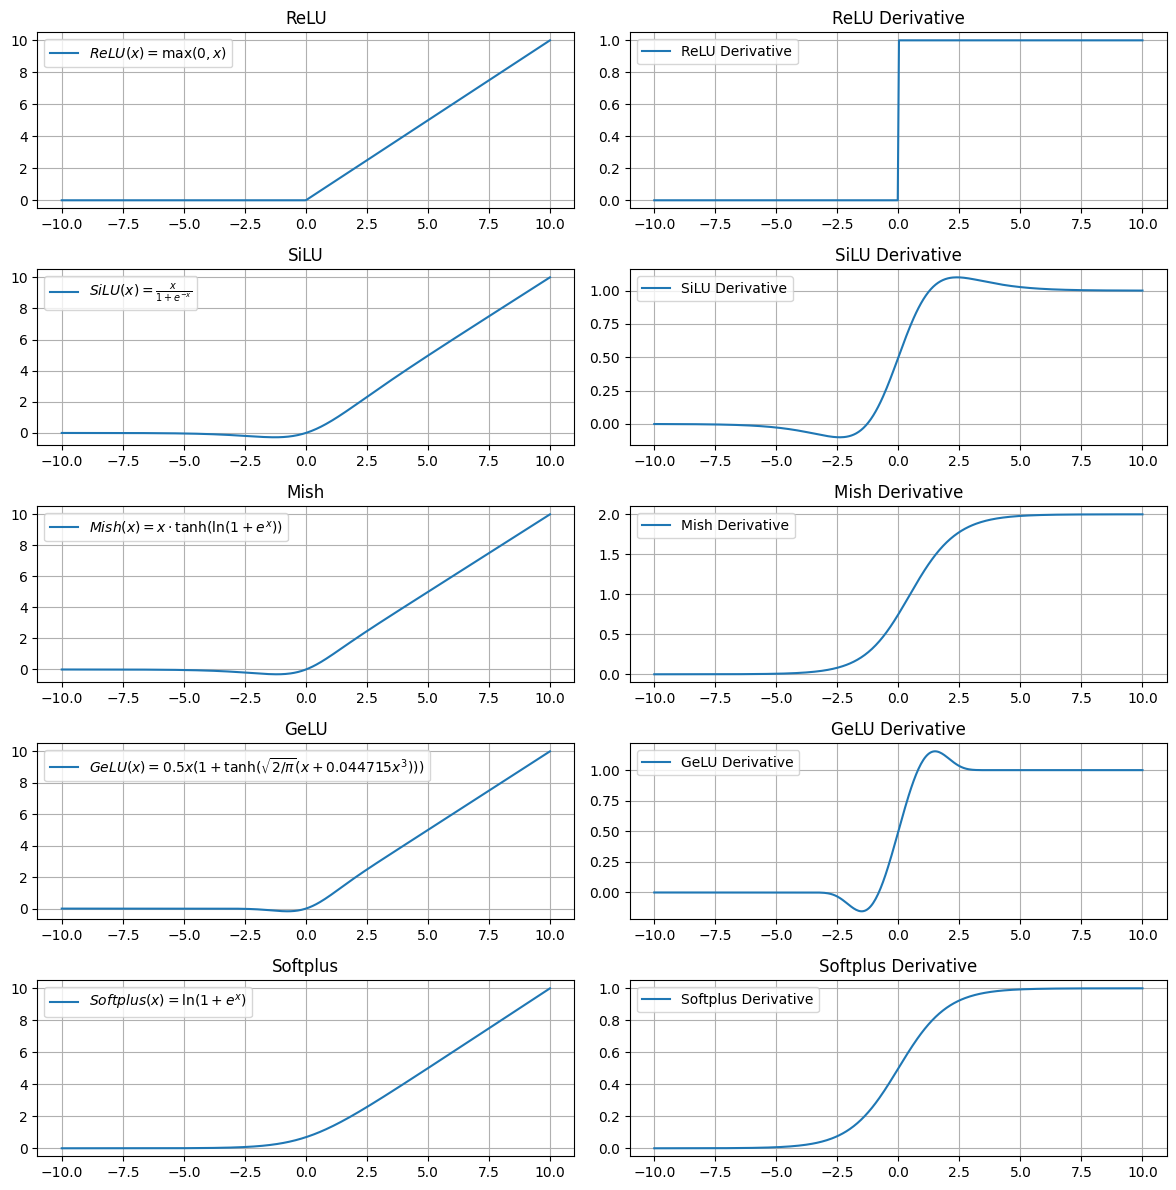

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 1. ReLU
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

# 2. SiLU (Swish)
def silu(x):
    return x / (1 + np.exp(-x))

def silu_derivative(x):
    sigmoid = 1 / (1 + np.exp(-x))
    return sigmoid * (1 + x * (1 - sigmoid))

# 3. Mish
def mish(x):
    return x * np.tanh(np.log(1 + np.exp(x)))

def mish_derivative(x):
    omega = np.exp(x)
    delta = 1 + omega
    return (omega * delta + omega**2) / (delta**2 + 1e-10)  # Додано мале число для уникнення ділення на нуль

# 4. GeLU
def gelu(x):
    return 0.5 * x * (1 + np.tanh(np.sqrt(2 / np.pi) * (x + 0.044715 * x**3)))

def gelu_derivative(x):
    cdf = 0.5 * (1 + np.tanh(np.sqrt(2 / np.pi) * (x + 0.044715 * x**3)))
    pdf = np.exp(-0.5 * (np.sqrt(2 / np.pi) * (x + 0.044715 * x**3))**2) / np.sqrt(2 * np.pi)
    return cdf + x * pdf * (0.0356774 * x**2 + 0.797885)

# 5. Softplus
def softplus(x):
    return np.log(1 + np.exp(x))

def softplus_derivative(x):
    return 1 / (1 + np.exp(-x))

# Візуалізація функцій та їх похідних
x = np.linspace(-10, 10, 400)
functions = [
    (relu, relu_derivative, "ReLU", r'$ReLU(x) = \max(0, x)$'),
    (silu, silu_derivative, "SiLU", r'$SiLU(x) = \frac{x}{1 + e^{-x}}$'),
    (mish, mish_derivative, "Mish", r'$Mish(x) = x \cdot \tanh(\ln(1 + e^x))$'),
    (gelu, gelu_derivative, "GeLU", r'$GeLU(x) = 0.5x(1 + \tanh(\sqrt{2/\pi}(x + 0.044715x^3)))$'),
    (softplus, softplus_derivative, "Softplus", r'$Softplus(x) = \ln(1 + e^x)$')
]

plt.figure(figsize=(12, 12))
for i, (func, derivative, name, formula) in enumerate(functions):
    plt.subplot(5, 2, 2*i + 1)
    plt.plot(x, func(x))
    plt.title(f'{name}')
    plt.legend([formula])
    plt.grid(True)
    
    plt.subplot(5, 2, 2*i + 2)
    plt.plot(x, derivative(x))
    plt.title(f'{name} Derivative')
    plt.legend([f'{name} Derivative'])
    plt.grid(True)

plt.tight_layout()
plt.show()
